In [28]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Safety_DataSet_Aggregated.csv')

In [29]:
df

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
0,0,12.0,143.298294,0.818112,-9.941461,-2.014999,-0.016245,-0.094040,0.070732,0.0,3.442991,0.0
1,0,8.0,143.298294,0.546405,-9.835590,-2.038925,-0.047092,-0.078874,0.043187,1.0,0.228454,0.0
2,0,8.0,143.298294,-1.706207,-9.270792,-1.209448,-0.028965,-0.032652,0.015390,2.0,0.228454,0.0
3,0,8.0,143.298294,-1.416705,-9.548032,-1.860977,-0.022413,0.005049,-0.025753,3.0,0.228454,0.0
4,0,8.0,143.298294,-0.598145,-9.853534,-1.378574,-0.014297,-0.046206,0.021902,4.0,0.228454,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
208220,17179869356,12.0,30.500853,0.008524,-10.605402,-0.400906,0.181231,-0.036964,0.038077,629.0,17.832005,1.0
208221,17179869356,12.0,30.500853,0.473880,-8.989215,-0.238211,0.003965,-0.119015,0.006995,630.0,17.832005,1.0
208222,17179869356,12.0,30.500853,-0.242847,-9.555359,-0.864319,0.007124,0.019864,-0.034493,631.0,18.370449,1.0
208223,17179869356,12.0,30.500853,-0.983948,-10.761218,0.581247,-0.159154,-0.099981,0.002282,632.0,18.400093,1.0


In [30]:
import numpy as np
# Transform the accelerometer data
df['accelerometer_data'] = np.sqrt((df['acceleration_x'])**2 + (df['acceleration_y'])**2 + (df['acceleration_z'])**2)
df

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label,accelerometer_data
0,0,12.0,143.298294,0.818112,-9.941461,-2.014999,-0.016245,-0.094040,0.070732,0.0,3.442991,0.0,10.176551
1,0,8.0,143.298294,0.546405,-9.835590,-2.038925,-0.047092,-0.078874,0.043187,1.0,0.228454,0.0,10.059553
2,0,8.0,143.298294,-1.706207,-9.270792,-1.209448,-0.028965,-0.032652,0.015390,2.0,0.228454,0.0,9.503762
3,0,8.0,143.298294,-1.416705,-9.548032,-1.860977,-0.022413,0.005049,-0.025753,3.0,0.228454,0.0,9.830320
4,0,8.0,143.298294,-0.598145,-9.853534,-1.378574,-0.014297,-0.046206,0.021902,4.0,0.228454,0.0,9.967466
...,...,...,...,...,...,...,...,...,...,...,...,...,...
208220,17179869356,12.0,30.500853,0.008524,-10.605402,-0.400906,0.181231,-0.036964,0.038077,629.0,17.832005,1.0,10.612980
208221,17179869356,12.0,30.500853,0.473880,-8.989215,-0.238211,0.003965,-0.119015,0.006995,630.0,17.832005,1.0,9.004848
208222,17179869356,12.0,30.500853,-0.242847,-9.555359,-0.864319,0.007124,0.019864,-0.034493,631.0,18.370449,1.0,9.597443
208223,17179869356,12.0,30.500853,-0.983948,-10.761218,0.581247,-0.159154,-0.099981,0.002282,632.0,18.400093,1.0,10.821729


In [31]:
bins = [0, 300, 600, 900, 1200, 1600, 1900]
df['sec_binned'] = pd.cut(df['second'], bins)
df['sec_binned'] = df['sec_binned'].astype("string")
df['sec_binned'] = df.sec_binned.fillna("(0, 300]")
df['sec_binned'] = df['sec_binned'].astype('category')
df

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label,accelerometer_data,sec_binned
0,0,12.0,143.298294,0.818112,-9.941461,-2.014999,-0.016245,-0.094040,0.070732,0.0,3.442991,0.0,10.176551,"(0, 300]"
1,0,8.0,143.298294,0.546405,-9.835590,-2.038925,-0.047092,-0.078874,0.043187,1.0,0.228454,0.0,10.059553,"(0, 300]"
2,0,8.0,143.298294,-1.706207,-9.270792,-1.209448,-0.028965,-0.032652,0.015390,2.0,0.228454,0.0,9.503762,"(0, 300]"
3,0,8.0,143.298294,-1.416705,-9.548032,-1.860977,-0.022413,0.005049,-0.025753,3.0,0.228454,0.0,9.830320,"(0, 300]"
4,0,8.0,143.298294,-0.598145,-9.853534,-1.378574,-0.014297,-0.046206,0.021902,4.0,0.228454,0.0,9.967466,"(0, 300]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208220,17179869356,12.0,30.500853,0.008524,-10.605402,-0.400906,0.181231,-0.036964,0.038077,629.0,17.832005,1.0,10.612980,"(600, 900]"
208221,17179869356,12.0,30.500853,0.473880,-8.989215,-0.238211,0.003965,-0.119015,0.006995,630.0,17.832005,1.0,9.004848,"(600, 900]"
208222,17179869356,12.0,30.500853,-0.242847,-9.555359,-0.864319,0.007124,0.019864,-0.034493,631.0,18.370449,1.0,9.597443,"(600, 900]"
208223,17179869356,12.0,30.500853,-0.983948,-10.761218,0.581247,-0.159154,-0.099981,0.002282,632.0,18.400093,1.0,10.821729,"(600, 900]"


In [32]:
# normal
df_norm = df[df['label'] == 0]
df_norm.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label,accelerometer_data,sec_binned
0,0,12.0,143.298294,0.818112,-9.941461,-2.014999,-0.016245,-0.094040,0.070732,0.0,3.442991,0.0,10.176551,"(0, 300]"
1,0,8.0,143.298294,0.546405,-9.835590,-2.038925,-0.047092,-0.078874,0.043187,1.0,0.228454,0.0,10.059553,"(0, 300]"
2,0,8.0,143.298294,-1.706207,-9.270792,-1.209448,-0.028965,-0.032652,0.015390,2.0,0.228454,0.0,9.503762,"(0, 300]"
3,0,8.0,143.298294,-1.416705,-9.548032,-1.860977,-0.022413,0.005049,-0.025753,3.0,0.228454,0.0,9.830320,"(0, 300]"
4,0,8.0,143.298294,-0.598145,-9.853534,-1.378574,-0.014297,-0.046206,0.021902,4.0,0.228454,0.0,9.967466,"(0, 300]"


In [33]:
# dangerous
df_dang = df[df['label'] == 1]
df_dang.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label,accelerometer_data,sec_binned
1004,1,4.0,252.0,-1.394632,10.174141,-2.503770,0.016127,0.212284,-0.039776,0.0,4.756427,1.0,10.570100,"(0, 300]"
1005,1,4.0,236.0,-0.840489,8.749026,-3.274607,0.037472,0.134862,-0.011083,1.0,4.937211,1.0,9.379495,"(0, 300]"
1006,1,4.0,228.0,-1.944456,8.989030,-2.978358,-0.024487,0.102224,-0.014870,2.0,5.544210,1.0,9.667171,"(0, 300]"
1007,1,4.0,222.0,-0.820675,9.282243,-2.126961,0.007522,0.089431,0.006004,3.0,6.564030,1.0,9.558112,"(0, 300]"
1008,1,4.0,216.0,-1.020284,9.382215,-2.618797,-0.019007,0.002409,-0.014382,4.0,7.358976,1.0,9.794133,"(0, 300]"


In [34]:
# Acceleration normal
acc_data_mean_0 = df_norm.groupby('sec_binned')['accelerometer_data'].mean()
acc_data_mean_0

sec_binned
(0, 300]        10.071756
(1200, 1600]     9.869788
(1600, 1900]     9.889123
(300, 600]      10.111864
(600, 900]      10.208915
(900, 1200]     10.233065
Name: accelerometer_data, dtype: float64

In [35]:
# Acceleration dangerous
acc_data_mean_1 = df_dang.groupby('sec_binned')['accelerometer_data'].mean()
acc_data_mean_1

sec_binned
(0, 300]         9.948367
(1200, 1600]     9.861125
(1600, 1900]    10.066264
(300, 600]       9.860027
(600, 900]       9.857821
(900, 1200]      9.837349
Name: accelerometer_data, dtype: float64

In [36]:
# speed normal
speed_data_mean_0 = df_norm.groupby('sec_binned')['Speed'].mean()
speed_data_mean_0

sec_binned
(0, 300]         6.298694
(1200, 1600]    13.300636
(1600, 1900]    10.857077
(300, 600]       9.500104
(600, 900]      12.522206
(900, 1200]     12.593104
Name: Speed, dtype: float64

In [37]:
# speed dangerous
speed_data_mean_1 = df_dang.groupby('sec_binned')['Speed'].mean()
speed_data_mean_1

sec_binned
(0, 300]         5.935425
(1200, 1600]    12.541571
(1600, 1900]    14.045837
(300, 600]       6.458514
(600, 900]      11.205535
(900, 1200]     12.524127
Name: Speed, dtype: float64

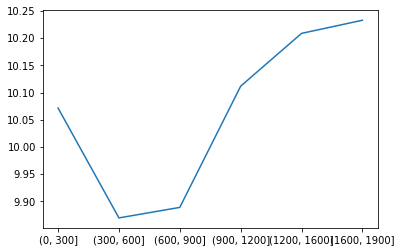

In [38]:
import matplotlib.pyplot as plt
plt.plot( df_norm['sec_binned'].unique(), acc_data_mean_0)

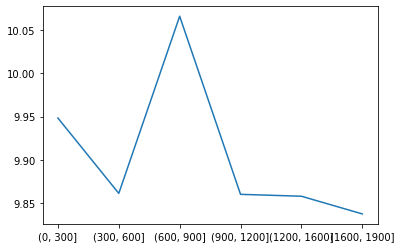

In [39]:
plt.plot( df_dang['sec_binned'].unique(), acc_data_mean_1)

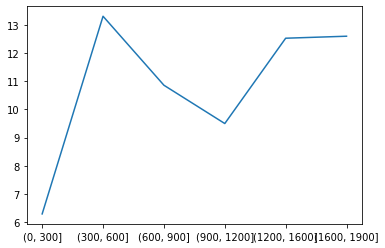

In [40]:
plt.plot( df_norm['sec_binned'].unique(), speed_data_mean_0)

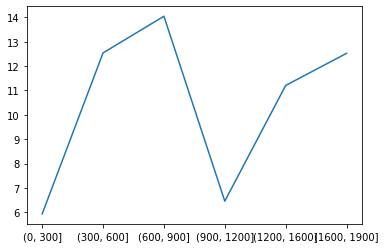

In [41]:
plt.plot( df_dang['sec_binned'].unique(), speed_data_mean_1)

In [42]:
df0 = df[df['label'] == 0].sample(n=len(df[df['label'] == 1]))
df0

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label,accelerometer_data,sec_binned
60364,122,3.900,107.000000,0.988835,8.437425,4.048719,-0.117897,-0.038485,0.061087,1000.0,15.437002,0.0,9.410636,"(900, 1200]"
99026,8589934620,3.900,288.000000,0.957710,9.809344,2.406246,0.065984,-0.021369,0.023779,1000.0,18.541178,0.0,10.145465,"(900, 1200]"
173998,8589934762,6.000,145.000000,-2.985661,9.610620,0.184359,0.019345,0.180633,0.048568,508.0,12.970275,0.0,10.065395,"(300, 600]"
136024,8589934684,3.000,230.598450,0.011514,-10.624393,0.115442,-0.033891,-0.009473,-0.015294,468.0,17.910185,0.0,10.625026,"(300, 600]"
114448,8589934644,4.000,232.000000,0.185780,9.923334,-0.874324,-0.054542,0.092450,0.015830,997.0,18.674452,0.0,9.963509,"(900, 1200]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167741,8589934754,8.000,217.772949,0.497955,-10.251898,-0.361429,-0.036904,0.103642,-0.019717,412.0,11.596201,0.0,10.270346,"(300, 600]"
13360,27,8.413,153.000000,0.300472,9.345168,2.402581,0.023968,-0.014647,0.019441,164.0,1.750000,0.0,9.653748,"(0, 300]"
103457,8589934629,4.000,333.529327,-2.569778,-8.636011,-4.185666,0.030310,-0.214444,-0.112123,351.0,8.229567,0.0,9.935001,"(300, 600]"
72944,148,3.796,196.000000,-1.562515,8.750549,3.802200,-0.015961,0.066711,0.006302,461.0,2.980000,0.0,9.668003,"(300, 600]"


In [43]:
df1= df[df['label']==1]
df1

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label,accelerometer_data,sec_binned
1004,1,4.0,252.000000,-1.394632,10.174141,-2.503770,0.016127,0.212284,-0.039776,0.0,4.756427,1.0,10.570100,"(0, 300]"
1005,1,4.0,236.000000,-0.840489,8.749026,-3.274607,0.037472,0.134862,-0.011083,1.0,4.937211,1.0,9.379495,"(0, 300]"
1006,1,4.0,228.000000,-1.944456,8.989030,-2.978358,-0.024487,0.102224,-0.014870,2.0,5.544210,1.0,9.667171,"(0, 300]"
1007,1,4.0,222.000000,-0.820675,9.282243,-2.126961,0.007522,0.089431,0.006004,3.0,6.564030,1.0,9.558112,"(0, 300]"
1008,1,4.0,216.000000,-1.020284,9.382215,-2.618797,-0.019007,0.002409,-0.014382,4.0,7.358976,1.0,9.794133,"(0, 300]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208219,17179869356,12.0,32.595501,0.750372,-10.556204,1.236664,0.059241,0.088651,0.161236,628.0,16.541101,1.0,10.654851,"(600, 900]"
208220,17179869356,12.0,30.500853,0.008524,-10.605402,-0.400906,0.181231,-0.036964,0.038077,629.0,17.832005,1.0,10.612980,"(600, 900]"
208221,17179869356,12.0,30.500853,0.473880,-8.989215,-0.238211,0.003965,-0.119015,0.006995,630.0,17.832005,1.0,9.004848,"(600, 900]"
208222,17179869356,12.0,30.500853,-0.242847,-9.555359,-0.864319,0.007124,0.019864,-0.034493,631.0,18.370449,1.0,9.597443,"(600, 900]"


In [44]:
df3 = pd.concat([df0,df1])
df3

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label,accelerometer_data,sec_binned
60364,122,3.9,107.000000,0.988835,8.437425,4.048719,-0.117897,-0.038485,0.061087,1000.0,15.437002,0.0,9.410636,"(900, 1200]"
99026,8589934620,3.9,288.000000,0.957710,9.809344,2.406246,0.065984,-0.021369,0.023779,1000.0,18.541178,0.0,10.145465,"(900, 1200]"
173998,8589934762,6.0,145.000000,-2.985661,9.610620,0.184359,0.019345,0.180633,0.048568,508.0,12.970275,0.0,10.065395,"(300, 600]"
136024,8589934684,3.0,230.598450,0.011514,-10.624393,0.115442,-0.033891,-0.009473,-0.015294,468.0,17.910185,0.0,10.625026,"(300, 600]"
114448,8589934644,4.0,232.000000,0.185780,9.923334,-0.874324,-0.054542,0.092450,0.015830,997.0,18.674452,0.0,9.963509,"(900, 1200]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208219,17179869356,12.0,32.595501,0.750372,-10.556204,1.236664,0.059241,0.088651,0.161236,628.0,16.541101,1.0,10.654851,"(600, 900]"
208220,17179869356,12.0,30.500853,0.008524,-10.605402,-0.400906,0.181231,-0.036964,0.038077,629.0,17.832005,1.0,10.612980,"(600, 900]"
208221,17179869356,12.0,30.500853,0.473880,-8.989215,-0.238211,0.003965,-0.119015,0.006995,630.0,17.832005,1.0,9.004848,"(600, 900]"
208222,17179869356,12.0,30.500853,-0.242847,-9.555359,-0.864319,0.007124,0.019864,-0.034493,631.0,18.370449,1.0,9.597443,"(600, 900]"


In [45]:
df3['label'].value_counts()

1.0    89305
0.0    89305
Name: label, dtype: int64

In [46]:
df4 = df3.drop(['sec_binned', 'bookingID','label'], axis=1)
df4

,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,accelerometer_data
60364,3.9,107.000000,0.988835,8.437425,4.048719,-0.117897,-0.038485,0.061087,1000.0,15.437002,9.410636
99026,3.9,288.000000,0.957710,9.809344,2.406246,0.065984,-0.021369,0.023779,1000.0,18.541178,10.145465
173998,6.0,145.000000,-2.985661,9.610620,0.184359,0.019345,0.180633,0.048568,508.0,12.970275,10.065395
136024,3.0,230.598450,0.011514,-10.624393,0.115442,-0.033891,-0.009473,-0.015294,468.0,17.910185,10.625026
114448,4.0,232.000000,0.185780,9.923334,-0.874324,-0.054542,0.092450,0.015830,997.0,18.674452,9.963509
...,...,...,...,...,...,...,...,...,...,...,...
208219,12.0,32.595501,0.750372,-10.556204,1.236664,0.059241,0.088651,0.161236,628.0,16.541101,10.654851
208220,12.0,30.500853,0.008524,-10.605402,-0.400906,0.181231,-0.036964,0.038077,629.0,17.832005,10.612980
208221,12.0,30.500853,0.473880,-8.989215,-0.238211,0.003965,-0.119015,0.006995,630.0,17.832005,9.004848
208222,12.0,30.500853,-0.242847,-9.555359,-0.864319,0.007124,0.019864,-0.034493,631.0,18.370449,9.597443


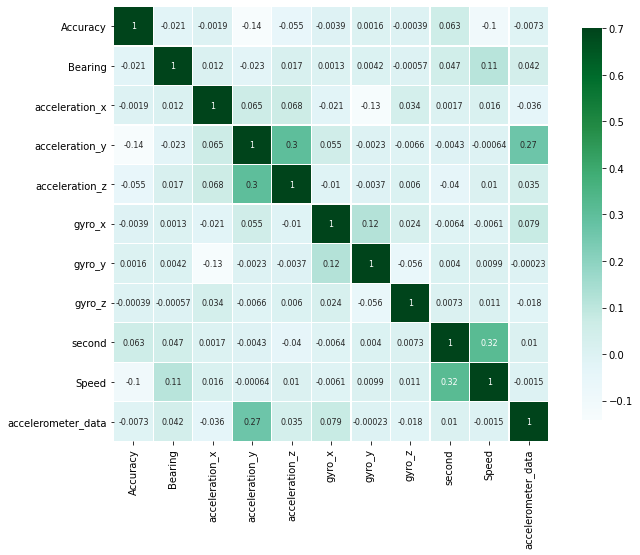

In [47]:
f, ax = plt.subplots(figsize=(12,8));

sns.heatmap(df4.corr(),linewidths=0.25, vmax=0.7, square= True, cmap='BuGn', linecolor='w',
           annot=True, annot_kws={'size': 8}, cbar_kws={'shrink' : 0.9});

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


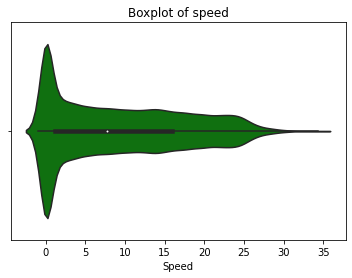

In [51]:
# exploration on variable 'speed'
plt.title("Boxplot of speed")
sns.violinplot(df4["Speed"],color='green')